## Data Analysis in Python through the HTRC Feature Reader

Summary: *We introduce a toolkit for working with the 13.6 million volume Extracted Features Dataset from the HathiTrust Research Center. You will learn how to peer at the words and trends of any book in the collection, while developing broadly useful Python data analysis skills.*

The HathiTrust holds nearly 15 million digitized volumes from libraries around the world. In addition to their individual value, these works in aggregate are extremely valuable for historians. Spanning many centuries and genres, they offer a way to learn about large-scale trends in history and culture, as well as evidence for changes in language or even the structure of the book. To simplify access to this collection, the HathiTrust Research Center (HTRC) has released the Extracted Features dataset (Capitanu et al. 2015): a dataset that provides quantitative information describing every page of every volume in the collection.

In this lesson, we introduce the HTRC Feature Reader, a library for working with the HTRC Extracted Features dataset using the Python programming language. The HTRC Feature Reader is structured to support work using popular data science libraries, particularly Pandas. Pandas provides simple structures for holding data and powerful ways to interact with it. The HTRC Feature Reader uses these data structures, so learning how to use it will also cover general data analysis skills in Python.

Today, you'll learn:

- How to work with *notebooks*, an interactive environment for data science in Python;
- Methods to read and visualize text data for millions of books with the HTRC Feature Reader; and
- Data malleability, the skills to select, slice, and summarize extracted feature data using the flexible "DataFrame" structure.

## Background

The **HathiTrust Research Center** (**HTRC**) is the research arm of the HathiTrust, tasked with supporting research usage of the works held by the HathiTrust. Particularly, this support involves mediating large-scale access to materials in a non-consumptive manner, which aims to allow research over a work without enabling that work to be traditionally enjoyed or read by a human reader.  Huge digital collections can be of public benefit by allowing scholars to make insights about history and culture, and the non-consumptive model allows for these uses to be sought within the restrictions of intellectual property law.

As part of its mission, the HTRC has released the **Extracted Features** dataset, containing features derived for every page of 4.8 million 'volumes' (a generalized term referring to the different types of materials in the HathiTrust collection, of which books are the most prevalent type).

What is a feature? A **feature** is a quantifiable marker of something measurable, a datum. A computer cannot understand the meaning of a sentence implicitly, but it can understand the counts of various words and word forms, or the presence or absence of stylistic markers, from which it can be trained to better understand text. Many text features are non-consumptive in that they don't retain enough information to reconstruct the book text.

Not all features are useful, and not all algorithms use the same features. With the HTRC EF Dataset, we have tried to tried to include the most generally useful features, as well as adapting to scholarly needs. We include per-page information such as counts of words tagged by part of speech (e.g. *how many times does the word `jaguar` appear as a lowercase noun on this page*), line and sentence counts, and counts of characters at the leftmost and rightmost sides of a page. No positional information is provided, so the data would not specify if 'brown' is followed by 'dog', though the information is shared for every single page, so you can at least infer how often 'brown' and 'dog' occurred in the same general vicinity within a text.

With easy access and features already extracted, the Extracted Features dataset offers a great entry point to programmatic text analysis and text mining. To further simplify beginner usage, the HTRC has released the HTRC Feature Reader. The **HTRC Feature Reader** scaffolds use of the dataset with the Python programming language.

This tutorial teaches the fundamentals of using the Extracted Features dataset with the HTRC Feature Reader. The HTRC Feature Reader is designed to make use of data structures from the most popular scientific tools in Python, so the skills taught here will apply to other settings of data analysis. In this way, the Extracted Features dataset is a particularly good use case for learning more general text analysis skills. We will look at data structures for holding text, patterns for querying and filtering that information, and ways to summarize, group, and visualize the data.

## Possibilities

Though it is relatively new, the Extracted Features dataset is already seeing use by scholars, as seen on a [page collected by the HTRC](https://wiki.htrc.illinois.edu/display/COM/Extracted+Features+in+the+Wild).

[Underwood](http://dx.doi.org/10.6084/m9.figshare.1279201) leveraged the features for identifying genres, such as fiction, poetry, and drama (2014). Associated with this work, he has released a dataset of 178k books classified by genre alongside genre-specific word counts ([Underwood 2015](http://dx.doi.org/10.13012/J8JW8BSJ)).

The Underwood subset of the Extracted Features dataset was used by Forster (2015) to [observing gender in literature](http://cforster.com/2015/09/gender-in-hathitrust-dataset/), illustrating the decline of woman authors through the 19th century.

The Extracted Features dataset also underlies higher-level analytic tools. [Mimno](http://mimno.infosci.cornell.edu/wordsim/nearest.html) processed word co-occurrence tables per year, allowing others to view how correlations between topics change over time (2014). The [HT Bookworm](https://analytics.hathitrust.org/bookworm) project has developed an API and visualization tools to support exploration of trends within the HathiTrust collection across various classes, genres, and languages. Finally, we have developed an approach to [within-book topic modelling](https://github.com/organisciak/htrc-book-models) which functions as a mnemonic accompaniment to a previously-read book (Organisciak 2014).

## Suggested Prior Skills

This lesson provides a gentle but technical introduction to text analysis in Python with the HTRC Feature Reader. Most of the code is provided, but is most useful if you are comfortable tinkering with it and seeing how outputs change when you do.

We recommend a baseline knowledge of Python conventions, which can be learned with Turkel and Crymble's [series of Python lessions](http://programminghistorian.org/lessons/introduction-and-installation) on Programming Historian.

The skills taught here are focused on flexibly accessing and working with already-computed text features. For a better understanding of the process of deriving word features, Programming Historian provides a lesson on [Counting Frequencies](http://programminghistorian.org/lessons/counting-frequencies), by Turkel and Crymble.

A more detailed look at text analysis with Python is provided in the [Art of Literary Text Analysis](https://github.com/sgsinclair/alta/blob/master/ipynb/ArtOfLiteraryTextAnalysis.ipynb) (Sinclair). The Art of Literary Text Analysis (ALTA) provides a deeper introduction to foundation Python skills, as well as introducing further text concepts to accompany the skills we cover in this lesson. This includes lessons on extracting features ([tokenization](https://github.com/sgsinclair/alta/blob/master/ipynb/Nltk.ipynb), [collocations](https://github.com/sgsinclair/alta/blob/master/ipynb/RepeatingPhrases.ipynb)), and [visualizing trends](https://github.com/sgsinclair/alta/blob/master/ipynb/GettingGraphical.ipynb).

# Download the Lesson Files

To follow along, download [lesson_files.zip](https://github.com/htrc/HTRC-Programming-Historian/releases/download/v.0.1/lesson_files.zip) and unzip it to any directory you choose.

The lesson files include a sample of files from the HTRC Extracted Features dataset. After you learn to use the feature data in this lesson, you may want to work with the entirety of the dataset. The details on how to do this are described in [Appendix: rsync](#appendix-downloading-custom-files-via-rsync).

## Installation

For this lesson, you need to install the HTRC Feature Reader library for Python alongside the data science libraries that it depends on. 

For ease, this lesson will focus on installing Python through a scientific distribution called Anaconda. Anaconda is an easy-to-install Python distribution that already includes most of the dependencies for the HTRC Feature Reader.

To install Anaconda, download the installer for your system from the [Anaconda download page](https://www.continuum.io/downloads) and follow their instructions for installation of either the Windows 64-bit Graphical Installer or the Mac OS X 64-bit Graphical Installer. You can choose either version of Python for this lesson. If you have followed earlier lessons on Python at the *Programming Historian*, you are using Python 2, but the HTRC Feature Reader also supports Python 3.

<img src="images/conda-install.PNG" width="400px" alt="Conda Install" />

### Installing the HTRC Feature Reader

The HTRC Feature Reader can be installed by command line. First open a terminal application:

- *Windows*: Open 'Command Prompt' from the Start Menu and type: `activate`.
- *Mac OX/Linux*: Open 'Terminal' from Applications and type `source activate`.

If Anaconda was properly installed, you should see something similar to this:

<img src="images/activating-env.png" width="450px" />

Now, you need to type one command:

```bash
conda install -c organisciak htrc-feature-reader
```

This command installs the HTRC Feature Reader and its necessary dependencies. We specify `-c` so that the installation command knows to look for the program under the `organisciak` channel, the username of the library author.

That's it! At this point you have everything necessary to start reading HTRC Feature Reader files.

> *psst*, advanced users: You can install the HTRC Feature Reader *without* Anaconda with `pip install htrc-feature-reader`, though for this lesson you'll need to install two additional libraries `pip install matplotlib jupyter`. Also, note that not all manual installations are alike because of hard-to-configure system optimizations: this is why we recommend Anaconda. If you think your code is going slow, you should check that Numpy has access to [BLAS and LAPACK libraries](http://stackoverflow.com/a/19350234/233577) and install [Pandas recommended packages](http://pandas.pydata.org/pandas-docs/version/0.15.2/install.html#recommended-dependencies). The rest is up to you, advanced user!

## Start a Notebook

Using Python the traditional way -- writing a script to a file and running it -- can become clunky for text analysis, where the ability to look at and interact with data is invaluable.
This lesson uses an alternative approach: Jupyter notebooks.

Jupyter gives you an interactive version of Python (called IPython) that you can access in a "notebook" format in your web browser. This format has many benefits. The interactivity means that you don't need to re-run an entire script each time: you can run or re-run blocks of code as you go along, without losing your enviroment (i.e. the variables and code that are already loaded). The notebook format makes it easier to examine bits of information as you go along, and allows for text blocks to intersperse a narrative.

Jupyter was installed alongside Anaconda in the previous section, so it should be available to load now.

From the Start Menu (Windows) or Applications directory (Mac OS), open "Jupyter notebook". This will start Jupyter on your computer and open a browser window. Keep the console window in the background, the browser is where the magic happens.

<img alt="Jupyter Code Blocks" src="images/open-notebook.PNG" width="250px" />

If your web browser does not open automatically, Jupyter can be accessed by going to the address "localhost:8888" - or a different port number, which is noted in the console ("The Jupyter Notebook is running at..."):

<img width="500px" src="images/notebook-start.png" />

Jupyter is now showing a directory structure from your home folder. Navigate to the lesson folder where you unzipped [lesson_files.zip](https://github.com/programminghistorian/ph-submissions/raw/gh-pages/assets/extracted-features-lesson_files.zip).

In the lesson folder, open `Start Here.pynb`: your first notebook!

<img width="500px" src="images/notebook-hello-world.png" />

Here there are instructions for editing a cell of text or code, and running it. Try editing and running a cell, and notice that it only affects itself. Here are a few tips for using the notebook as the lesson continues:

- New cells are created with the <i class="fa-plus fa"> Plus</i> button in the toolbar. When not editing, this can be done by pressing 'b' on your keyboard.
- New cells are "code" cells by default, but can be changed to "Markdown" (a type of text input) in a dropdown menu on the toolbar. In edit mode, you can paste in code from this lesson or type it yourself.
- Switching a cell to edit mode is done by pressing Enter.
- Running a cell is done by clicking <i class="fa-step-forward fa"> Play</i> in the toolbar, or with `Ctrl+Enter` (`Ctrl+Return` on Mac OS). To run a cell and immediately move forward, use `Shift+Enter` instead.

> An example of a full-fledged notebook is included with the lesson files in `example/Lesson Draft.ipynb`.

In this notebook, it's time to give the HTRC Feature Reader a try. When it is time to try some code, start a new cell with <i class="fa-plus fa"> Plus</i>, and run the code with <i class="fa-step-forward fa"> Play</i>. Before continuing, click on the title to change it to something more descriptive than "Start Here".

## Reading your First Volume
The HTRC Feature Reader library has three main objects: **FeatureReader**, **Volume**, and **Page**.

The **FeatureReader** object is the interface for loading the dataset files and making sense of them. The files are originally formatted in a notation called JSON and compressed, which FeatureReader makes sense of and returns as Volume objects. A **Volume** is a representation of a single book or other work. This is where you access features about a work. Many features for a volume are collected from individual pages; to access Page information, you can use the **Page** object.

Let's load two volumes to understand how the FeatureReader works. Create a cell in the already-open Jupyter notebook and run the following code. This should give you the input shown below.

In [ ]:
from htrc_features import FeatureReader
import os
paths = [os.path.join('data', 'sample-file1.basic.json.bz2'), os.path.join('data', 'sample-file2.basic.json.bz2')]
fr = FeatureReader(paths)
for vol in fr.volumes():
    print(vol.title)

June / by Edith Barnard Delano ; with illustrations.
You never know your luck; being the story of a matrimonial deserter, by Gilbert Parker ... illustrated by W.L. Jacobs.


Here, the FeatureReader is imported and initialized with file paths pointing to two Extracted Features files. The files are in a directory called 'data'. Different systems do file paths differently: Windows uses forward slashes ('data/...') while Linux and Mac OS use back slashes ('data\...'). `os.path.join` is used to make sure that the file path is correctly structured, a convention to ensure that code works everywere.

With `fr = FeatureReader(paths)`, the FeatureReader is initialized, meaning it is ready to use. An initialized FeatureReader is holding the pointers to the file paths that we gave it, and will load them into Volume objects when asked.

Consider the last bit of code:

```python
for vol in fr.volumes():
    print(vol.title)
```

This code asks for volumes in a way that can be iterated through. The `for` loop is saying to `fr.volumes()`, "give me every single volume that you have, one by one." Each time the `for` loop gets a volume, it starts calling it `vol`, runs what is inside the loop on it, then asks for the next one. In this case, we just told it to print the title of the volume.

You may recognize `for` loops from past experience iterating through what is known as a `list` in Python. However, it is important to note that `fr.volumes()` is *not* a list. If you try to access it directly, it won't print all the volumes; rather, it identifies itself as a something known as a generator:

<img src="images/generator.png" width="500px">

What is a generator, and why do we iterate over it?

Generators are the key to working with lots of data. They allow you to iterate over a set of items that don't exist yet, preparing them only when it is their turn to be acted upon. 

Remember that there are 13.6 million volumes in the Extracted Features dataset. When coding at that scale, you need to be be mindful of two rules:

1. Don't hold everything in memory: you can't. Use it, reduce it, and move on.
2. Don't devote cycles to processing something before you need it.

A generator simplifies such on-demand, short term usage. Think of it like a pizza shop making pizzas when a customer orders, versus one that prepares them beforehand. The traditional approach to iterating through data is akin to making *all* the pizzas for the day before opening. Doing so would make the buying process quicker, but also adds a huge upfront time cost, needs larger ovens, and necessitates the space to hold all the pizzas at once. An alternate approach is to make pizzas on-demand when customers buy them, allowing the pizza place to work with smaller capacities and without having pizzas laying around the shop. This is the type of approach that a generator allows.

Volumes need to be prepared before you do anything with them, being read, decompressed and parsed. This 'initialization' of a volume is done when you ask for the volume, *not* when you create the FeatureReader. In the above code, after you run `fr = FeatureReader(paths)`, there are are still no `Volume` objects held behind the scenes: just the pointers to the file locations. The files are only read when their time comes in the loop on the generator `fr.volumes()`. Note that because of this one-by-one reading, the items of a generator cannot be accessed out of order (e.g. you cannot ask for the third item of `fr.volumes()` without going through the first two first).

## What's in a Volume?

Let's take a closer look at what features are accessible for a Volume object. For clarity, we'll grab the first Volume to focus on, which can conveniently be accessed with the `first()` method. Any code you write can easily be run later with a `for vol in fr.volumes()` loop.

Again here, start a new code cell in the same notebook that you had open before and run the following code. The FeatureReader does not need to be loaded again: it is still initialized and accessible as `fr` from earlier.

In [ ]:
# Reading a single volume
vol = fr.first()
vol

While the majority of the HTRC Extracted Features dataset is *features*, quantitative abstractions of a book's written content, there is also a small amount of metadata included for each volume. We already saw `Volume.title` accessed earlier. Other metadata includes:

- `Volume.id`: A unique identifier for the volume in the HathiTrust and the HathiTrust Research Center.
- `Volume.year`: The publishing date of the volume.
- `Volume.language`: The classified language of the volume.
- `Volume.oclc`: The OCLC control number(s).

The volume id can be used to pull more information from other sources. The scanned copy of the book can be found from the HathiTrust Digital Library, when available, by accessing `http://hdl.handle.net/2027/{VOLUME ID}`. In the feature reader, this url is retrieved by calling `vol.handle_url`:

In [ ]:
print(vol.handle_url)

http://hdl.handle.net/2027/nyp.33433075749246


<img alt="Digital copy of sample book" src="images/June-cover.png" width="250px" />

Hopefully by now you are growing more comfortable with the process of running code in a Jupyter notebook, starting a cell, writing code, and running the cell. A valuable property of this type of interactive coding is that there is room for error. An error doesn't cause the whole program to crash, requiring you to rerun everything from the start. Instead, just fix the code in your cell and try again.

In Jupyter, pressing the 'TAB' key will guess at what you want to type next. Typing `vo` then TAB will fill in `vol`, typing `Fea` then TAB will fill in `FeatureReader`.

Auto-completion with the tab key also provides more information about what you can get from an object. Try typing `vol.` (with the period) in a new cell, then press TAB. Jupyter shows everything that you can access for that Volume.

![Tab Autocomplete in Jupyter](images/autocomplete.png)

The Extracted Features dataset does not hold all the metadata that the HathiTrust has for the book. More in-depth metadata like genre and subject class needs to be grabbed from other sources, such as the [HathiTrust Bibliographic API](https://www.hathitrust.org/bib_api). The URL to access this information can be retrieved with `vol.ht_bib_url`.

An additional data source for metadata is the [HTRC Solr Proxy](https://wiki.htrc.illinois.edu/display/COM/Solr+Proxy+API+User+Guide), which allows searches for many books at a time, but only for Public Domain books. `vol.metadata` can ask this source for metadata straight from your code. Remember that pinging HTRC adds overhead, so an efficient large-scale algorithm should avoid `vol.metadata`.

## Our First Feature Access: Visualizing Words Per Page

It's time to access the first features of `vol`: a table of total words for every single page. These can be accessed by calling `vol.tokens_per_page()`. Try the following code.

> If you are using a Jupyter notebook, returning this table at the end of a cell formats it nicely in the browser. Below, you'll see us append `.head()` to the `tokens` table, which allows us to look at just the top few rows: the 'head' of the data. 

In [ ]:
tokens = vol.tokens_per_page()
# Show just the first few rows, so we can look at what it looks like
tokens.head()

,count
page,
1,5
2,0
3,1
4,0
5,1


> No print! We didn't call 'print()' to make Jupyter show the table. Instead, it automatically guessed that you want to display the information from the last code line of the cell.

This is a straightforward table of information, similar to what you would see in Excel or Google Spreadsheets. Listed in the table are page numbers and the count of words on each page. With only two dimensions, it is trivial to plot the number of words per page. The table structure holding the data has a `plot` method for data graphics. Without extra arguments, `tokens.plot()` will assume that you want a line chart with the page on the x-axis and word count on the y-axis.

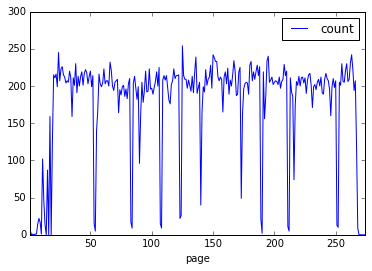

In [ ]:
%matplotlib inline
tokens.plot()

> `%matplotlib inline` tells Jupyter to show the plotted image directly in the notebook web page. It only needs to be called once, and isn't needed if you're not using notebooks.

On some systems, this may take some time the first time. It is clear that pages at the start of a book have fewer words per page, after which the count is fairly steady except for occasional valleys.

You may have some guesses for what these patterns mean. A look at the [scans](http://hdl.handle.net/2027/nyp.33433074811310) confirms that the large valleys are often illustration pages or blank pages, small valleys are chapter headings, and the upward pattern at the start is from front matter. 

Not all books will have the same patterns so we can't just codify these correlations for millions of books. However, looking at this plot makes clear an inportant assumption in text and data mining: that there are patterns underlying even the basic statistics derived from a text. The trick is to identify the consistent and interesting patterns and teach them to a computer.

### Understanding DataFrames

Wait... how did we get here so quickly!? We went from a volume to a data visualization in two lines of code. The magic is in the data structure used to hold our table of data: a DataFrame.

A **DataFrame** is a type of object provided by the data analysis library, Pandas. **Pandas** is very common for data analysis, allowing conveniences in Python that are found in statistical languages like R or Matlab.

In the first line, `vol.tokens_per_page()` returns a DataFrame, something that can be confirmed if you ask Python what about its type with `type(tokens)`. This means that _after setting `tokens`, we're no longer working with HTRC-specific code, just book data held in a common and very robust table-like construct from Pandas_. `tokens.head()` used a DataFrame method to look at the first few rows of the dataset, and `tokens.plot()` uses a method from Pandas to visualize data.

Many of the methods in the HTRC Feature Reader return DataFrames. The aim is to fit into the workflow of an experienced user, rather than requiring them to learn proprietary new formats. For new Python data mining users, learning to use the HTRC Feature Reader means learning many data mining skills that will translate to other uses.

## Loading a Token List

The information contained in `vol.tokens_per_page()` is minimal, a sum of all words in the body of each page. 
The Extracted Features dataset also provides token counts with much more granularity: for every part of speech (e.g. noun, verb) of every occurring capitalization of every word of every section (i.e. header, footer, body) of every page of the volume. 

`tokens_per_page()` only kept the "for every page" grouping; `vol.tokenlist()` can be called to return section-, part-of-speech-, and word-specific details:

In [ ]:
tl = vol.tokenlist()
# Let's look at some words deeper into the book:
# from 1000th to 1100th row, skipping by 15 [1000:1100:15]
tl[1000:1100:15]

count
page section token     pos       
27   body    those     DT       1
             within    IN       1
28   body    a         DT       3
             be        VB       1
             deserted  VBN      1
             faintly   RB       1
             important JJ       1

As before, the data is returned as a Pandas DataFrame. This time, there is much more information. Consider a single row:

<img src="images/single-row-tokencount.png" width="300px" />

The columns in bold are an index. Unlike the typical one-dimensional index seen before, here there are four dimensions to the index: page, section, token, and pos. This row says that for the 24th page, in the body section (i.e. ignoring any words in the header or footer), the word 'years' occurs 1 time as an plural noun. The part-of-speech tag for a plural noun, `NNS`, follows the [Penn Treebank](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) definition.

> The "words" on the first page seems to be OCR errors for the cover of the book. The HTRC Feature Reader refers to "pages" as the $n^{th}$ scanned image of the volume, not the actual number printed on the page. This is why "page 1" for this example is the cover.

Tokenlists can be retrieved with arguments that combine information by certain dimensions, such as `case`, `pos`, or `page`. For example, `case=False` specified that "Jaguar" and "jaguar" should be counted together. You may also notice that, by default, only 'body' is returned, a default that can be overridden.

Look at the following list of commands: can you guess what the output will look like? Try for yourself and observe how the output changes.

 - `vol.tokenlist(case=False)`
 - `vol.tokenlist(pos=False)`
 - `vol.tokenlist(pages=False, case=False, pos=False)`
 - `vol.tokenlist(section='header')`
 - `vol.tokenlist(section='group')`

Details for these arguments are available in the code [documentation](http://htrc.github.io/htrc-feature-reader/htrc_features/feature_reader.m.html#htrc_features.feature_reader.Volume.tokenlist) for the Feature Reader.

Jupyter provides another convenience here. Documentation can be accessed within the notebook by adding a '?' to the start of a piece of code. Try it with `?vol.tokenlist`, or with other objects or variables.

## Working with DataFrames

The Pandas DataFrame type returned by the HTRC Feature Reader is very malleable. To work with the tokenlist that you retrieved earlier, three skills are particularily valuable:

1. Selecting subsets by a condition
2. Slicing by named row index
3. Grouping and aggregating

### Selecting Subsets of a DataFrame by a Condition

Consider this example: *I only want to look at tokens that occur more than a hundred times in the book.* 

Remembering that the table-like output from the HTRC Feature Reader is a Pandas DataFrame, the way to pursue this goal is to learn to filter and subset DataFrames. Knowing how to do so is important for working with just the data that you need.

To subset individual rows of a DataFrame, you can provide a series of True/False values to the DataFrame, formatted in square brackets. When True, the DataFrame returns that row; when False, the row is excluded from what is returned.

To see this in context, first load a basic tokenlist without parts-of-speech or individual pages:

In [ ]:
tl_simple = vol.tokenlist(pos=False, pages=False)
# .sample(5) returns five random words from the full result
tl_simple.sample(5)

count
section token           
body    halleluya      4
        realty         1
        addressed      4
        win-           1
        broke          3

To select just the relevant tokens, we need to look at each row and evaluate whether it matches the criteria that "this token has a count greater than 100". Let's try to convert to code.

"This token has a count" means that we are concerned specifically in the 'count' column, which can be singled out from the `tl` table with `tl['count']`. "greater than 100" is formalized as `> 100`. Putting it together, try the following and see what you get:

```python
tl_simple['count'] > 100
```

It is a DataFrame of True/False values. Each value indicates whether the 'count' column in the row matches the criteria or not. We haven't selected a subset yet, we simply asked a question and were told for each row when the question was true or false.

> You may wonder why section and token are still seen, even though 'count' was selected. These are part of the DataFrame **index**, so they're considered part of the information *about* that row rather than data *in* the row. You can convert the index to data columns with `reset_index()`. In this lesson we will keep the index intact, though there are advanced cases where there are benefits to resetting it.

Armed with the True/False values of whether each token's 'count' value is or isn't greater than 100, we can give those values to `tl_simple` in square brackets.

In [ ]:
matches = tl_simple['count'] > 100
tl_simple[matches].sample(5)

count
section token       
body    they     127
        have     210
        The      107
        about    110
        ,       3258

You can move the comparison straight into the square brackets, the more conventional equivalent of the above:

In [ ]:
tl_simple[tl_simple['count'] > 100].sample(5)

count
section token       
body    not      220
        had      455
        have     210
        ,       3258
        his      206

As might be expected, many of the tokens that occur very often are common words like "she" and "and", as well as various punctuation. 

Multiple conditions can be chained with `&` (and) or `|` (or), using regular brackets so that Python knows the order of operations. For example, words with a count greater than 150 *and* a count less than 200 are selected in this way:

In [ ]:
tl_simple[(tl_simple['count'] > 150) & (tl_simple['count'] < 200)]

count
section token       
body    Mr.      159
        be       196
        but      178
        do       179
        is       170
        on       190
        —        167

In [ ]:
token_idx = tl_simple.index.get_level_values("token")
tl_simple[token_idx.str.isalpha()]

count
section token                
body    A                  16
        AFRAID              1
        AFTER               1
        ALL                 2
        AM                  1
        AND                 7
        ANNE                2
        AT                  1
        Abrams              5
        Affectionately      1
        After               7
        Again               1
        Ah                  1
        Aimee             125
        All                 4
        Already             1
        Although            2
        Am                  1
        America             1
        An                  1
        And                66
        Anne               75
        Answer              1
        Any                 1
        Anybody             1
        Anything            2
        Apostle             1
        April               1
        As                 12
        Association         1
...                       ...
        wrong               7
        wrote               8
        wusser              1
        yams                3
        yard                2
        ye                  1
        year                9
        yearned             2
        years              33
        yellow              6
        yellowed            1
        yer                 5
        yere                1
        yes                 8
        yet                23
        yez                 1
        yield               1
        yielded             1
        yit                 1
        yo                  4
        you               394
        young              44
        younger             6
        youngest            1
        youngsters          1
        your               58
        yours               6
        yourself            4
        yourselves          1
        youth               1

[4257 rows x 1 columns]

### Slicing DataFrames

Above, subsets of the DataFrame were selected based on a matching criteria for columns. It is also possible to select a DataFrame subset by specifying the values of its index, a process called **slicing**. For example, you can ask, *"give me all the verbs for pages 9-12"*.

In the DataFrame returned by `vol.tokenlist()`, page, section, token, and POS were part of the index (try the command `tl.index.names` to confirm). One can think of an index as the margin content of an Excel spreadsheet: the numbers along the top and letters along the right side are the indices. A cell can be referred to as A1, A2, B1... In pandas, however, you can name these, so instead of A, B, C, rows can be referred to by more descriptive names. You can also have multiple levels, so you're not bound by the two-dimensions of a table format. With a multi-indexed DataFrame, you can ask for `Page=24,section=Body, ...`.

<img src="images/Excel.PNG" width="300px" />
*One can think of an index as the margin notations in Excel (i.e. 1,2,3... and A,B,C,..), except it can be named and can have multiple levels.*
    
Slicing a DataFrame against a labelled index is done using `DataFrame.loc[]`. Try the following examples and see what is returned:

- Select information from page 17: 
  - `tl.loc[(17),]`
- Select 'body' section of page 17:
  - `tl.loc[(17, 'body'),]`
- Select counts of the word 'Anne' in the 'body' section of page 17:
  - `tl.loc[(17, 'body', 'Anne'),]`

The levels of the index are specified in order, so in this case the first value refers to 'page', then 'section', and so on. To skip specifying anything for an index level -- that is, to select everything for that level -- `slice(None)` can be used as a placeholder:

- Select counts of the word 'Anne' for all pages and all page sections
  - `tl.loc[(slice(None), slice(None), "Anne"),]`
  
Finally, it is possible to select multiple labels for a level of the index, with a list of labels (i.e. `['label1', 'label2']`) or a sequence covering everything from one value to another (i.e. `slice(start, end)`):

- Select pages 37, 38, and 52
  - `tl.loc[([37, 38, 52]),]`
- Select all pages from 37 to 40
  - `tl.loc[(slice(37, 40)),]`
- Select counts for 'Anne' or 'Hilary' from all pages
  - tl.loc[(slice(None), slice(None), ["Anne", "Hilary"]),]
  
> The reason for the comma in `tl.loc[(...),]` is because columns can be selected in the same way after the comma. Pandas DataFrames can have a multiple-level index for columns, but the HTRC Feature Reader does not use this.

Knowing how to slice, let's try to find the word "CHAPTER" in this book, and compare where that shows up to the token-per-page pattern previously plotted.

The token list we previously set to `tl` only included body text; to include headers and footers in a search for `CHAPTER` we'll grab a new tokenlist with `section='all'` specified.

In [ ]:
tl_all = vol.tokenlist(section='all')
chapter_pages = tl_all.loc[(slice(None), slice(None), "CHAPTER"),]
chapter_pages

,,,,count
page,section,token,pos,
19,header,CHAPTER,NNP,1
35,header,CHAPTER,NNP,1
56,header,CHAPTER,NNP,1
73,header,CHAPTER,NNP,1
91,header,CHAPTER,NNP,1
115,header,CHAPTER,NNP,1
141,header,CHAPTER,NNP,1
158,header,CHAPTER,NNP,1
174,header,CHAPTER,NNP,1


Earlier, token counts were visualized using `tokens.plot()`, a built-in function of DataFrames that uses the Matplotlib visualization library. 

We can add to the earlier visualization by using Matplotlib directly. Try the following code in a new cell, which goes through every page number in the earlier search for 'CHAPTER' and adds a red vertical line at the place in the chart with `matplotlib.pyplot.axvline()`:

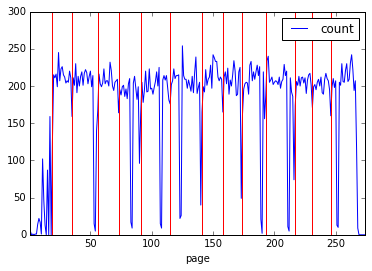

In [ ]:
# Get just the page numbers from the search for "CHAPTER"
page_numbers = chapter_pages.index.get_level_values('page')

# Visualize the tokens-per-page from before
tokens.plot()

# Add vertical lines for pages with "CHAPTER"
import matplotlib.pyplot as plt
for page_number in page_numbers:
    plt.axvline(x=page_number, color='red')

> Advanced: Though slicing with `loc` is more common when working with the index, it is possible to create a True/False list from an index to select rows as we did earlier. Here's an advanced example that grabs the 'token' part of the index and, using the `isalpha()` string method that Pandas provides, filters to fully alphabetical words.
``` 
token_idx = tl.index.get_level_values("token")
tl[token_idx.str.isalpha()]
```
Readers familiar with regular expressions (see [Understanding Regular Expressions](http://programminghistorian.org/lessons/understanding-regular-expressions) by Doug Knox) can adapt this example for even more robust selection using the `contains()` string method.

## Sorting DataFrames

A DataFrame can be sorted with `DataFrame.sort_values()`, specifying the column to sort by as the first argument. By default, sorting is done in ascending order:

In [ ]:
tl_simple.sort_values('count').head()

count
section token             
body    gratified        1
        reminding        1
        dome             1
        remembering      1
        remains          1

Descending order is possible with the argument `ascending=False`, which puts the most common tokens at the top. For example:

In [ ]:
tl_simple.sort_values('count', ascending=False).head()

count
section token       
body    ,       3258
        "       1670
        the     1565
        .       1532
        and     1252

The most common tokens are 'the' and 'and', alongside punctuation.

*Exercise: Try to retrieve the five most-common tokens used as a noun ('NNP') or a plural noun ('NNS') in the book*. You will have to get a new tokenlist, without pages but with parts-of-speech, then slice by the criteria, sort, and output the first five rows. ([Solution](https://gist.github.com/organisciak/163e59ea6cf71c3cd12de410d075567c))

### Grouping DataFrames

Up to this point, the token count DataFrames have been subsetted, but not modified from the way they were returned by the HTRC Feature Reader. There are many cases where one may want to perform aggregation or transformation based on subsets of data. To do this, Pandas supports the 'split-apply-combine' pattern (Wickham 2011).

Split-apply-combine refers to the process of dividing a dataset into groups (*split*), performing some activity for each of those groups (*apply*), and joining the new groups back together into a single DataFrame (*combine*).

<img src="images/split-apply-combine.png" width="500px"/>

<img src="images/example-split-apply-combine.png" width="600px"/>
** Figure: Example of Split-Apply-Combine, averaging movie grosses by director.**

Split-apply-combine processes are supported on DataFrames with `groupby()`, which tells Pandas to split by some criteria. From there, it is possible to apply some change to each group individually, after which Pandas combines the affected groups into a single DataFrame again.

Try the following, can you tell what happens?

```
tl.groupby(level=["pos"]).sum()
```

The output is a count of how often each part-of-speech tag ("pos") occurs in the entire book.

- *Split* with `groupby()`: We took the token count dataframe that is set to `tl` and grouped by the part-of-speech (`pos`) level of the index. This means that rather than thinking into terms of rows, Pandas is now thinking of the `tl` DataFrame as a series of smaller groups, the groups selected by a common value for part of speech. So, all the personal pronouns ("PRP") are in one group, and all the adverbs ("RB") are in another, and so on.
- *Apply* with `sum()`: These groups were sent to an apply function, `sum()`. Sum is an aggregation function, so it sums all the information in the 'count' column for each group. For example, all the rows of data in the adverb group are summed up into a single count of all adverbs. 
- *Combine*: The combine step is implicit: the DataFrame knows from the `groupby` pattern to take everything that the apply function gives back (in the case of 'sum', just one row for every group) and stick it together.

`sum()` is one of many convenient functions [built-in](http://pandas.pydata.org/pandas-docs/stable/groupby.html) to Panadas. Other useful functions are `mean()`, `count()`, `max()`. It is also possible to send your groups to any function that you write with `apply()`.

> groupby can be used on data columns or an index. To run against an index, use `level=[index_level_name]` as above. To group against columns, use `by=[column_name]`.

Below are some examples of grouping token counts.

- Find most common tokens in the entire volume (sorting by most to least occurrances)
  - `tl.groupby(level="token").sum().sort_values("count", ascending=False)`
- Count how many pages each token/pos combination occurs on
  - `tl.groupby(level=["token", "pos"]).count()`
  
Remember from earlier that certain information can be called by sending arguments to `vol.tokenlist()`, so you don't always have to do the grouping yourself.

With `sum`, the data is being reduced: only one row is left for each group. It is also possible to 'transform' a group, where the same number of rows are returned. This is useful if processing is necessary based on the group statistics, such as percentages. Here is an advanced example of transformation, a [TF\*IDF](https://porganized.com/2016/03/09/term-weighting-for-humanists/) function. TF\*IDF weighs a token's value to a document based on how common it is. In this case, it highlights words that are notable for a page but not the entire book.

In [ ]:
from numpy import log
def tfidf(x):
    return x * log(1+vol.page_count / x.count())
# Will take a few seconds to run, depending on your system
idf_scores = tl.groupby(level=["token"]).transform(tfidf)
idf_scores[1000:1100:30]

count
page section token pos          
24   body    years NNS  2.315830
25   body    asked VBD  1.730605
             him   PRP  2.994040
             n't   RB   1.250162

Compare the parts of the function given to `transform()` with the equation:

$ IDF_w = log(1 + \frac{N}{df_w}) $

N is the total number of pages. Document frequency, $df_w$, is 'how many pages (docs) does the word occur on?' That is the `x.count()`. Can you modify the above to use corpus frequency, which is 'how many times does the word occur overall in the corpus (i.e. across all pages)?' You'd want to add everything up.

# More Features in the HTRC Extracted Features Dataset

So far we have mainly used token-counting features, accessed through `Volume.tokenlist()`. The HTRC Extracted Features Dataset provides more features at the volume level. Here are other features that are available to Volume objects. Try them on `vol` and see what the output is:

- `vol.line_counts()`: How many vertically spaced lines of text, a measure related to the phyical format of the page.
- `vol.sentence_counts()`: How many sentences of text: a measure related to the content on a page.
- `vol.empty_line_counts()`: How many larger vertical spaces are there on the page between lines of text? This can be used as a proxy for paragraph count. This is based on what software was used to OCR so there are inconsistencies: not all scans in the HathiTrust are OCR'd identically.
- `vol.begin_line_chars()`, `vol.end_line_chars()`: The count of different characters along the left-most and right-most sides of a page. This can tell you about what kind of page it is: for example, a table of contents might have a lot of numbers or roman numerals at the end of each line

Earlier, we saw that the number of words on a page gave some indication of whether it was a page of the story or a different kind of page (chapter, front matter, etc). We can see that line count is another contextual 'hint':

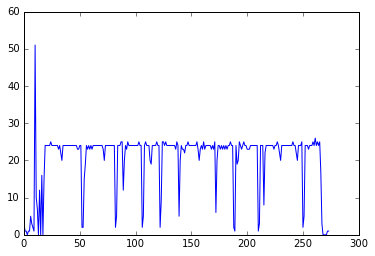

In [ ]:
line_counts = vol.line_counts()
plt.plot(line_counts)

The majority of pages have 20-25 lines, confirmable with a histogram: `plt.hist(line_counts)`. This is likely what a full page of text looks like in this book. A scholar trying to focus on patterns only in the text and comfortable missing a few short pages might choose to filter to just these pages.

## Page-Level Features

If you open the raw dataset file for a HTRC EF volume on your computer, you may notice that features are provided for each page. While this lesson has focused on volumes, most of the features that we have seen can be accessed for a single page; e.g. `Page.tokenlist()` instead of `Volume.tokenlist()`. The methods to access the features are named the same, with the exception that `line_count`, `empty_line_count`, and `sentence_count` are not pluralized.

Like iterating over `FeatureReader.volumes()` to get Volume objects, it is possible to iterate across pages with `Volume.pages()`.

# Next Steps

Now that you know the basics of the HTRC Feature Reader, you can learn more about the [Extracted Features dataset](https://analytics.hathitrust.org/features). The [Feature Reader home page](https://github.com/htrc/htrc-feature-reader/blob/master/README.ipynb) contains a lesson similar to this one but for more advanced users (that's you now!), and the [code documentation](http://htrc.github.io/htrc-feature-reader/htrc_features/feature_reader.m.html) gives exact information about what types of information can be called.

Underwood (2015) has released [genre classifications of public-domain texts in the HTRC EF Dataset](https://analytics.hathitrust.org/genre), comprised of fiction, poetry, and drama. Though many historians will be interested in other corners of the dataset, fiction is a good place to tinker with text mining ideas because of its expressiveness and relative format consistency.

Finally, the repository for the HTRC Feature Feature has [advanced tutorial notebooks](https://github.com/htrc/htrc-feature-reader/tree/master/examples) showing how to use the library further. One such tutorial shows how to [derive 'plot arcs' for a text](https://github.com/htrc/htrc-feature-reader/blob/master/examples/Within-Book%20Sentiment%20Trends.ipynb), a process popularized by Jockers (2015).

![Plot Arc Example](images/plot-arc.png)
<center>**Plot Arc Example** </center>

# References

Boris Capitanu, Ted Underwood, Peter Organisciak, Sayan Bhattacharyya, Loretta Auvil, Colleen Fallaw, J. Stephen Downie (2015). "Extracted Feature Dataset from 4.8 Million HathiTrust Digital Library Public Domain Volumes" (0.2)[Dataset]. *HathiTrust Research Center*, doi:10.13012/j8td9v7m.

Chris Forster. "A Walk Through the Metadata: Gender in the HathiTrust Dataset." Blog. http://cforster.com/2015/09/gender-in-hathitrust-dataset/.

Matthew L. Jockers (Feb 2015). "Revealing Sentiment and Plot Arcs with the Syuzhet Package". *Matthew L. Jockers*. Blog. http://www.matthewjockers.net/2015/02/02/syuzhet/.

Peter Organisciak, Loretta Auvil, J. Stephen Downie (2015). “Remembering books: A within-book topic mapping technique.” Digital Humanities 2015. Sydney, Australia.

Underwood, Ted (2014): Understanding Genre in a Collection of a Million Volumes, Interim Report. figshare.
https://dx.doi.org/10.6084/m9.figshare.1281251.v1.

Ted Underwood, Boris Capitanu, Peter Organisciak, Sayan Bhattacharyya, Loretta Auvil, Colleen Fallaw, J. Stephen Downie (2015). "Word Frequencies in English-Language Literature, 1700-1922" (0.2) [Dataset]. *HathiTrust Research Center*. https://dx.doi.org/10.13012/J8JW8BSJ.

Hadley Wickham (2011). "The split-apply-combine strategy for data analysis". *Journal of Statistical Software*, 40(1), 1-29.

# Appendix: Downloading custom files via rsync

The full HTRC Extracted Features dataset is accessible using *rsync*, a Unix command line program for syncing files. It is already preinstalled on Linux or Mac OS. Windows users need to use *rsync* by downloading a program such as [https://cygwin.com/](Cygwin), which provides a Unix-like command line environment in Windows.

To download all *4 TB* comprising the EF dataset, you can use this command (be aware the full transfer will take a very long time):

```bash
rsync -rv data.analytics.hathitrust.org::features/ .
```

 This recurses (the `-r` flag) through all the folders on the HTRC server, and syncs all the files to a location on your system in this case a `.` meaning "the current folder"). The `-v` flag means `--verbose`, which show you more information.
 
It is possible to sync individual files but inputting a full file path. Files are organized in a pairtree structure, meaning that you can find an exact dataset file from a volume's HathiTrust id. The HTRC Feature Reader has a tools and instructions for [getting the path for a volume](https://github.com/htrc/htrc-feature-reader/blob/master/examples/ID_to_Rsync_Link.ipynb). A list of all file paths is available:

```bash
rsync -azv data.analytics.hathitrust.org::features/listing/file-listing.txt .
```

Finally, it is possible to download many files from a list of paths, such as those for public-domain [fiction](http://data.analytics.hathitrust.org/genre/fiction_paths.txt), [drama](http://data.analytics.hathitrust.org/genre/drama_paths.txt), and [poetry](http://data.analytics.hathitrust.org/genre/poetry_paths.txt) (Underwood 2014). For example:

```bash
rsync -azv --files-from=fiction_paths.txt data.analytics.hathitrust.org::features/ .
```